# Day 3: Booleans and Conditionals

Welcome to day 3 of the Python Challenge! In case you missed the first two days, here are links to day 1 and day 2. Today we'll learn about booleans and conditionals.

Python has a type bool which can take on one of two values: True and False.

In [16]:
x = True
print(x)
print(type(x))

True
<class 'bool'>


Rather than putting True or False directly in our code, we usually get boolean values from boolean operators. These are operators that answer questions of the form "is it the case that __?". We'll go through some of these operators below.

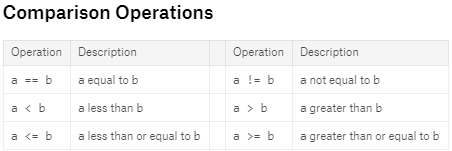

In [13]:
from IPython.display import Image
Image(filename='Learn Python Challenge - Day3.png', width = 500, height= 75)

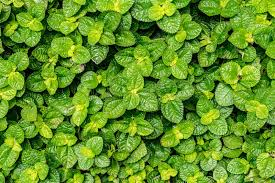

In [ ]:
def can_run_for_president(age):
    """Can someone of the given age run for president in the US?"""
    # The US Constitution says you must "have attained to the Age of thirty-five Years"
    return age >= 35

print("Can a 19-year-old run for president?", can_run_for_president(19))
print("Can a 45-year-old run for president?", can_run_for_president(45))

Comparisons are a little bit clever...

In [18]:
3.0 == 3

True

But not too clever...

In [19]:
'3' == 3

False

Comparison operators can be combined with the arithmetic operators we've already seen to express a virtually limitless range of mathematical tests. For example, we can check if a number is odd by checking that the modulus with 2 returns 1:

In [20]:
def is_odd(n):
    return (n % 2) == 1

print("Is 100 odd?", is_odd(100))
print("Is -1 odd?", is_odd(-1))

Is 100 odd? False
Is -1 odd? True


Remember to use == instead of = when making comparisons. If you wrote n == 2 you are asking about the value of n. When you write n = 2 you are changing the value of n.

### Combining Boolean Values

Python provides operators to combine boolean values using the standard concepts of "and", "or", and "not". And in fact, the corresponding Python operators use just those words: and, or, and not.

With these, we can make our can_run_for_president function more accurate.

In [21]:
def can_run_for_president(age, is_natural_born_citizen):
    """Can someone of the given age and citizenship status run for president in the US?"""
    # The US Constitution says you must be a natural born citizen *and* at least 35 years old
    return is_natural_born_citizen and (age >= 35)

print(can_run_for_president(19, True))
print(can_run_for_president(55, False))
print(can_run_for_president(55, True))

False
False
True


Quick, can you guess the value of this expression?

In [22]:
True or True and False

True

Python has precedence rules that determine the order in which operations get evaluated in expressions like above. For example, *and* has a higher precedence than *or*, which is why the first expression above is True. If we had evaluated it from left to right, we would have calculated True *or* True first (which is True), and then taken the *and* of that result with False, giving a final value of False.

In [50]:
True and False

False

In [51]:
True or False

True

You could try to memorize the order of precedence, but a safer bet is to just use liberal parentheses. Not only does this help prevent bugs, it makes your intentions clearer to anyone who reads your code.

For example, consider the following expression:

In [25]:
prepared_for_weather = have_umbrella or rain_level < 5 and have_hood or not rain_level > 0 and is_workday

I'm trying to say that I'm safe from today's weather....

   - if I have an umbrella...
   - or if the rain isn't too heavy and I have a hood...
   - otherwise, I'm still fine unless it's raining and it's a workday
   
But not only is my Python code hard to read, it has a bug. We can address both problems by adding some parentheses:

In [ ]:
prepared_for_weather = have_umbrella or (rain_level < 5 and have_hood) or not (rain_level > 0 and is_workday)

You can add even more parentheses if you think it helps readability:

In [30]:
prepared_for_weather = have_umbrella or ((rain_level < 5) and have_hood) or (not (rain_level > 0 and is_workday))

We can also split it over multiple lines to emphasize the 3-part structure described above:

In [29]:
prepared_for_weather = (
    have_umbrella 
    or ((rain_level < 5) and have_hood) 
    or (not (rain_level > 0 and is_workday)
# )

### Conditionals

While useful enough in their own right, booleans really start to shine when combined with conditional statements, using the keywords if, elif, and else.

Conditional statements, often referred to as if-then statements, allow the programmer to execute certain pieces of code depending on some Boolean condition. A basic example of a Python conditional statement is this:

In [31]:
def inspect(x):
    if x == 0:
        print(x, "is zero")
    elif x > 0:
        print(x, "is positive")
    elif x < 0:
        print(x, "is negative")
    else:
        print(x, "is unlike anything I've ever seen...")

inspect(0)
inspect(-15)

0 is zero
-15 is negative


Python adopts the if and else often used in other languages; its more unique keyword is elif, a contraction of "else if". In these conditional clauses, elif and else blocks are optional; additionally, you can include as many elif statements as you would like.

Note especially the use of colons (:) and whitespace to denote separate blocks of code. This is similar to what happens when we define a function - the function header ends with :, and the following line is indented with 4 spaces. All subsequent indented lines belong to the body of the function, until we encounter an unindented line, ending the function definition.

In [32]:
def f(x):
    if x > 0:
        print("Only printed when x is positive; x =", x)
        print("Also only printed when x is positive; x =", x)
    print("Always printed, regardless of x's value; x =", x)

f(1)
f(0)

Only printed when x is positive; x = 1
Also only printed when x is positive; x = 1
Always printed, regardless of x's value; x = 1
Always printed, regardless of x's value; x = 0


###  Boolean conversion

We've seen int(), which turns things into ints, and float(), which turns things into floats, so you might not be surprised to hear that Python has a bool() function which turns things into bools.

In [33]:
print(bool(1)) # all numbers are treated as true, except 0
print(bool(0))
print(bool("asf")) # all strings are treated as true, except the empty string ""
print(bool(""))
# Generally empty sequences (strings, lists, and other types we've yet to see like lists and tuples)
# are "falsey" and the rest are "truthy"

True
False
True
False


In [37]:
bool("")

False

We can use non-boolean objects in if conditions and other places where a boolean would be expected. Python will implicitly treat them as their corresponding boolean value:

In [41]:
if 0:
    print(0)
elif "spam":
    print("spam")

spam


### Conditional expressions (aka 'ternary')

Setting a variable to either of two values depending on some condition is a pretty common pattern.

In [42]:
def quiz_message(grade):
    if grade < 50:
        outcome = 'failed'
    else:
        outcome = 'passed'
    print('You', outcome, 'the quiz with a grade of', grade)
    
quiz_message(80)

You passed the quiz with a grade of 80


Python has a handy single-line 'conditional expression' syntax to simplify these cases:

In [43]:
def quiz_message(grade):
    outcome = 'failed' if grade < 50 else 'passed'
    print('You', outcome, 'the quiz with a grade of', grade)
    
quiz_message(45)

You failed the quiz with a grade of 45


You may recognize this as being similar to the ternary operator that exists in many other languages. For example, in javascript, we would write the assignment above as `var outcome = grade < 50 ? 'failed' : 'passed'`. (When it comes to readability, I think Python is the winner here.)

######  Content Link
https://www.kaggle.com/colinmorris/learn-python-challenge-day-3?utm_medium=email&utm_source=mailchimp&utm_campaign=python+challenge

## Now Lets Move on to Day3 Exercise